# purity of $CC1p$ in the selected events-sample

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/background/'

In [3]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_08_16_selected_genie_CC1p.csv and found the file...
8245 selected CC1p events overlay


## break up different background types

In [4]:
Nnormed,Nnormed_err = dict(),dict()
for pair_type in pair_types:
    Nnormed[pair_type] = float(len(selected_overlay[pair_type])*Nevents['f(POT)'])
    Nnormed_err[pair_type] = np.sqrt(len(selected_overlay[pair_type]))*Nevents['f(POT)']
    print '%.1f +/- %.1f'%(Nnormed[pair_type],Nnormed_err[pair_type]),pair_type,'after POT normalization'    
print_line()
Nnormed['off beam'] = (len(selected_beam_off)*OffBeam_scaling)
Nnormed_err['off beam'] = np.sqrt(len(selected_beam_off))*OffBeam_scaling
print '%.1f +/- %.1f'%(Nnormed['off beam'],Nnormed_err['off beam']),pair_type,'off-beam in on-beam equivalent'

Nnormed['on beam'] = len(selected_beam_on)
Nnormed_err['on beam'] = np.sqrt(len(selected_beam_on))
print '%.1f +/- %.1f'%(Nnormed['on beam'],Nnormed_err['on beam']),pair_type,'on-beam events'

498.4 +/- 5.1 1mu-1p after POT normalization
7.9 +/- 0.6 other-pairs after POT normalization
3.2 +/- 0.4 cosmic after POT normalization
411.2 +/- 4.6 CC1p0pi after POT normalization
422.5 +/- 4.7 CC1p after POT normalization
--------------------------------------------------------------
7.8 +/- 2.3 CC1p off-beam in on-beam equivalent
356.0 +/- 18.9 CC1p on-beam events


# break-up of 'other-pairs'

In [20]:
all_other_pairs = selected_overlay['other-pairs']
other_pairs_broken = all_other_pairs[all_other_pairs.isBrokenTrajectory==True]
other_pairs_nonbroken = all_other_pairs[all_other_pairs.isBrokenTrajectory==False]
print '%.1f'%(100*float(len(other_pairs_broken))/len(all_other_pairs)),'% are broken tracks'

7.1 % are broken tracks


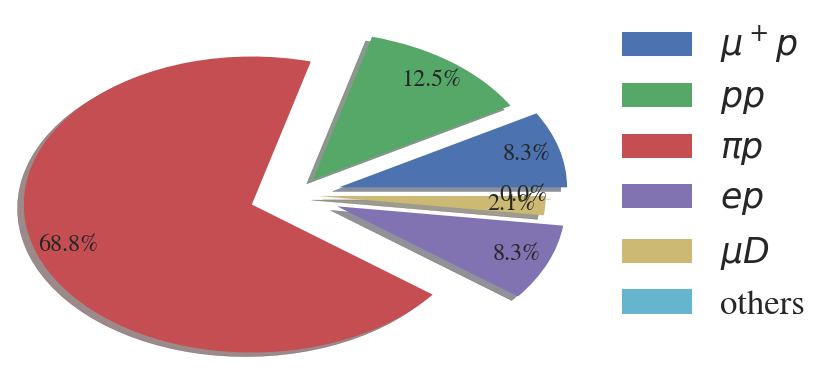

In [46]:
other_pairs_labels       = [r'$\mu^+ p$', r'$pp$' ,r'$\pi p$',r'$ep$'  ,r'$\mu D$']
other_pairs_pdg_products = [13*2212 , 2212*2212 , 211*2212, 11*2212  ,13*1000010020]
explode                  = [0.2     ,0.13      , 0.2      , 0.2     , 0.1]

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = other_pairs_nonbroken[np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(other_pairs_nonbroken) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(6,4))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=0.85,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('xx-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [27]:
pp = other_pairs_nonbroken[(other_pairs_nonbroken['pdg_short']==2212)
                           & (other_pairs_nonbroken['pdg_long'] == 2212)]
pp['closest_genie_mode']

25      1
28     10
31     10
32      1
33     10
40     10
42      2
45      2
63      0
66      1
83     10
92      1
99     10
112     1
127     0
131     1
139    10
142     2
Name: closest_genie_mode, dtype: int64

In [45]:
other_pairs_non_categorized = other_pairs_nonbroken[(np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) != 2212*2212)
                                                   &
                                                   (np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) != 211*2212)
                                                    &
                                                    (np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) != 11*2212)
                                                    &
                                                    (np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) != 13*1000010020)
                                                    &
                                                    (np.abs(other_pairs_nonbroken['pdg_short']*other_pairs_nonbroken['pdg_long']) != 13*2212)
                                                   ]
other_pairs_non_categorized[['pdg_long','pdg_short']]

,pdg_long,pdg_short


# break-up of 'µp non CC1p0π'

In [47]:
all_mup = selected_overlay['1mu-1p'][selected_overlay['1mu-1p'].CC1p==False]

1.1 % are broken tracks


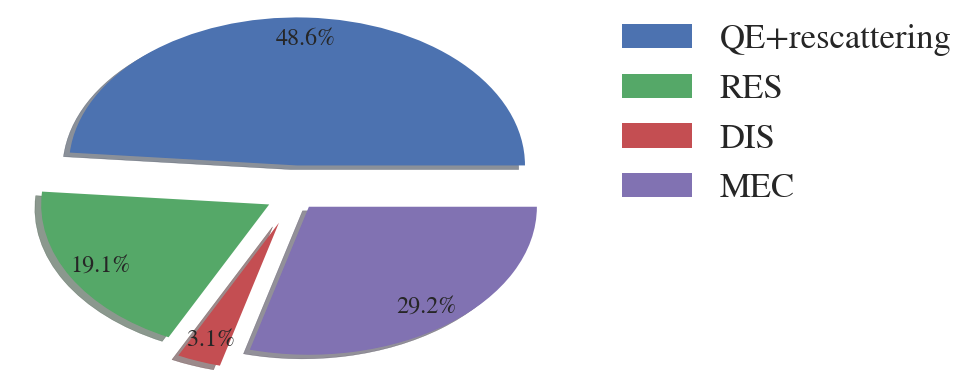

In [55]:
mup_labels       = ['QE+rescattering','RES','DIS','MEC']
mup_modes        = [0 , 1 , 2 , 10]
explode          = [0.2     ,0.13      , 0.2      , 0.1]

mup = dict()
mup_big_contribution = 0
len_mup = []
for key,mode in zip(mup_labels,mup_modes):    
    mup[key] = all_mup[all_mup['closest_genie_mode']==mode]
    mup_big_contribution += len(mup[key])
    len_mup.append(len(mup[key]))
len_non_categorized = len(all_mup) - mup_big_contribution
if (len_non_categorized):
    mup_labels.append('others')
    len_mup.append(len_non_categorized)
    explode.append(0.15)

# plot
fig=plt.figure(figsize=(6,4))
patches, texts, autotexts = plt.pie( len_mup, pctdistance=0.85,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('xx-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=mup_labels,fontsize=25)
plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# how many "QE" are from undetected particles
and how many "QE" are from the muon and proton not coming from the same vertex?

In [67]:
QE = all_mup[all_mup['closest_genie_mode']==0]

In [74]:
QE_not_from_the_same_vertex = QE[np.abs(QE.truth_startx_muCandidate - QE.truth_startx_pCandidate)>0]
print '%.1f'%(100.*float(len(QE_not_from_the_same_vertex))/len(QE)),'are from the muon and proton not coming from the same vertex'
QE_from_the_same_vertex = QE[np.abs(QE.truth_startx_muCandidate - QE.truth_startx_pCandidate)<=0]

33.5 are from the muon and proton not coming from the same vertex


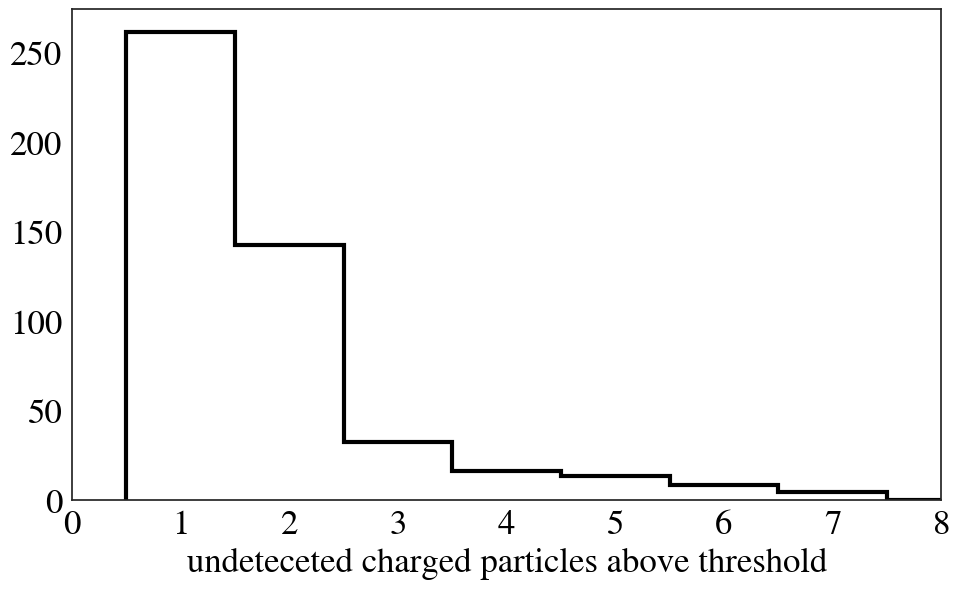

In [75]:
fig,ax=plt.subplots(figsize=(9.7,6))
plot_discrete_histogram(QE_from_the_same_vertex.closest_genie_Nprotons + QE_from_the_same_vertex.closest_genie_Npions)
set_axes(ax,'undeteceted charged particles above threshold',xlim=(0,8))

In [7]:
Nnormed['1mu-1p bkg'] = Nnormed['1mu-1p'] - Nnormed['CC1p']
Nnormed_err['1mu-1p bkg'] = np.sqrt(Nnormed['1mu-1p'] - Nnormed['CC1p'])
Nnormed['other pairs bkg'] = Nnormed['other-pairs']
Nnormed_err['other pairs bkg'] = np.sqrt(Nnormed['other-pairs'])
Nnormed['beam bkg'] = Nnormed['1mu-1p bkg'] + Nnormed['other pairs bkg']
Nnormed_err['beam bkg'] = np.sqrt( np.square(Nnormed_err['1mu-1p bkg']) + np.square(Nnormed_err['other pairs bkg']) )
Nnormed['background'] = Nnormed['beam bkg'] + Nnormed['off beam']
Nnormed_err['background'] = np.sqrt( np.square(Nnormed_err['beam bkg']) + np.square(Nnormed_err['off beam']) )
Nnormed['signal'] = Nnormed['on beam']
Nnormed_err['signal'] = Nnormed_err['on beam']

In [10]:
absolute_N_B = Nnormed['signal'] - Nnormed['background']
absolute_N_B_err = np.sqrt(np.square(Nnormed_err['signal']) + np.square(Nnormed_err['background']))
print 'absolute background subtracted beam-on: %.4f +/- %.4f'%(absolute_N_B,absolute_N_B_err)
np.savetxt(Paths['background maps'] + "beam_on_bkg_sbtrctd.csv", [absolute_N_B,absolute_N_B_err], delimiter=",")
print 'saved into',Paths['background maps'] + "beam_on_bkg_sbtrctd.csv"

mc_N_B = Nnormed['CC1p']
mc_N_B_err = Nnormed_err['CC1p']
print 'absolute CC1p in mc: %.4f +/- %.4f'%(mc_N_B,mc_N_B_err)
np.savetxt(Paths['background maps'] + "mc_cc1p.csv", [mc_N_B,mc_N_B_err], delimiter=",")
print 'saved into',Paths['background maps'] + "mc_cc1p.csv"

absolute background subtracted beam-on: 264.0614 +/- 21.0632
saved into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/background_maps/beam_on_bkg_sbtrctd.csv
absolute CC1p in mc: 420.7657 +/- 4.6435
saved into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/background_maps/mc_cc1p.csv
